In [1]:
from __future__ import annotations

import heapq
import math
import os
import re
from collections import defaultdict, deque
from itertools import combinations

import aocd
import numpy as np
from IPython.display import HTML
from scipy.ndimage import convolve
from tqdm.notebook import tqdm, trange

import sys
sys.path.append('../util')
from graph import Graph

from shapely.geometry import Polygon, box

import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

In [2]:
p = aocd.get_puzzle(year=2025, day=9)
p.examples[0].input_data

'7,1\n11,1\n11,7\n9,7\n9,5\n2,5\n2,3\n7,3'

In [3]:
def get_data(test_data: bool = False):
    if test_data:
        data = p.examples[0].input_data
    else:
        data = p.input_data
    return data

In [4]:
def process_data(data):
    data = [(int(l.split(",")[0]), int(l.split(",")[1])) for l in data.split("\n")]
    return data

# Part 1

In [5]:
data = get_data(test_data=True)
points = process_data(data)

In [6]:
def get_area(p1, p2):
    return (abs(p1[0] - p2[0]) + 1) * (abs(p1[1] - p2[1]) + 1)

In [7]:
%%time
comb = combinations(points, 2)
max([get_area(p1, p2) for p1, p2 in comb])

CPU times: user 34 μs, sys: 0 ns, total: 34 μs
Wall time: 36.2 μs


50

# Part 2

In [8]:
data = get_data(test_data=False)
points = process_data(data)

See https://shapely.readthedocs.io/en/2.1.2/reference/shapely.Polygon.html#shapely.Polygon for details on Polygon and box

In [9]:
%%time

poly = Polygon(points)

valid_rectangles = []

for (x1, y1), (x2, y2) in combinations(points, 2):
  
    min_x, max_x = min(x1, x2), max(x1, x2)
    min_y, max_y = min(y1, y2), max(y1, y2)
    
    # Create rectangle as shapely box
    rect = box(min_x, min_y, max_x, max_y)
    
    # Rectangle is valid if it's completely inside the polygon
    if poly.contains(rect):
        area = (max_x - min_x + 1) * (max_y - min_y + 1)
        valid_rectangles.append(((min_x, min_y), (max_x, max_y), area))

print(f"Found {len(valid_rectangles)} valid rectangles")

print(f"Max rectangle size: {max(r[2] for r in valid_rectangles)}")


Found 971 valid rectangles
Max rectangle size: 1568849600
CPU times: user 3.14 s, sys: 12.9 ms, total: 3.15 s
Wall time: 3.15 s


# Plot

In [10]:
res = ((0,0),(0,0),0)
for r in valid_rectangles:
    if r[2] >= res[2]:
        res = r

points = np.array(points)

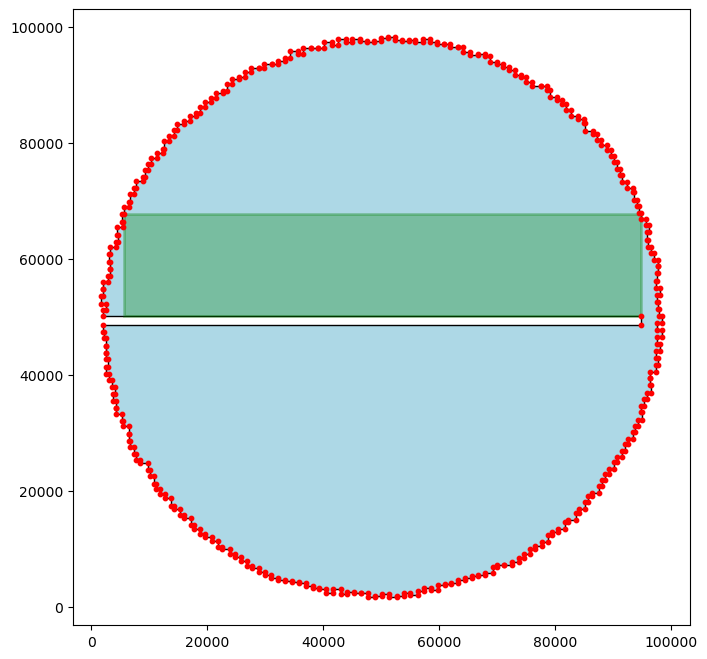

In [11]:

# Close the polygon by adding first point at the end
closed_points = np.vstack([points, points[0]])

fig, ax = plt.subplots(figsize=(8, 8))

# Draw polygon
path = Path(closed_points)
patch = patches.PathPatch(path, facecolor='lightblue', edgecolor='black', linewidth=1)
ax.add_patch(patch)

# Draw rectangle
min_x, min_y = res[0]
max_x, max_y = res[1]
width = max_x - min_x
height = max_y - min_y

rect = patches.Rectangle((min_x, min_y), width, height, 
                          linewidth=2, edgecolor='green', facecolor='green', alpha=0.3)
ax.add_patch(rect)

# Plot corner points
ax.scatter(points[:, 0], points[:, 1], c='red', s=10, zorder=5)

ax.set_aspect('equal')

plt.show()